<a href="https://colab.research.google.com/github/luisdiaz1997/BioinformaticsExamples/blob/master/GC_content.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import signal

In [0]:
gene = 'ACTGACTGCTAGCTGCTGACTGCATGCATGCTAGCTACTCGTACGTAGCTCTGCATCGCGCGCGGCGCATATACTGATCTACGCTAGCTGACTGCATGCGCGCGCGCGCG'

In [0]:
gene_dict = { 'A': 0, 'T':1, 'G':2, 'C':3}

In [0]:
gene_signal = np.array([gene_dict[n] for n in gene])

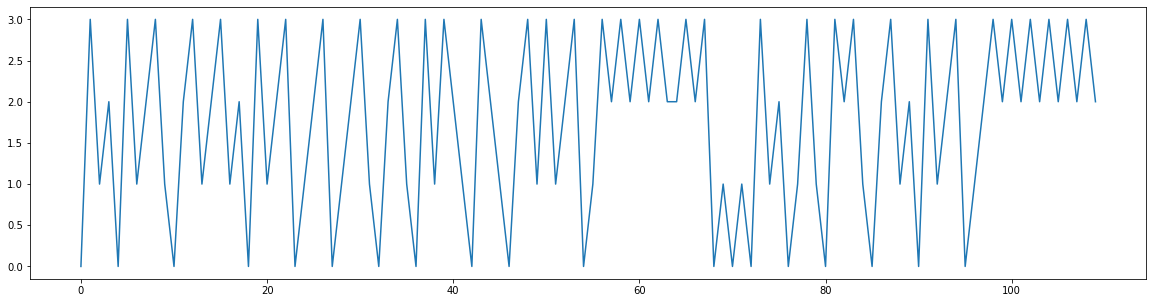

In [6]:
plt.figure(figsize = (20, 5))
plt.plot(gene_signal);

In [0]:
def one_hot_dna(gene_signal):
  one_hot = np.zeros((len(gene_signal), 4))
  for i, n in enumerate(gene_signal):
    one_hot[i, n] = 1

  return one_hot


In [0]:
def get_counts(genome):
  letter_count = dict()
  for n in genome:
    letter_count[n] = letter_count.get(n, 0) + 1
  return letter_count


In [0]:
def get_gc(counts):
  gc  = counts.get('G', 0) + counts.get('C', 0)
  total = sum([counts[key] for key in counts])
  return gc/total

In [0]:
def get_kmers(gene, k):
  kmers = [gene[i: i+k] for i in range(len(gene) - k + 1)]
  return kmers

In [0]:
sub_genes = [gene[i*10:(i+1)*10] for i in range(int(len(gene)/10))]

In [0]:
get_sig = lambda geneset: [get_gc(get_counts(section)) for section in geneset]

In [0]:
sig = get_sig(sub_genes)
sig2 = get_sig(get_kmers(gene, 12))

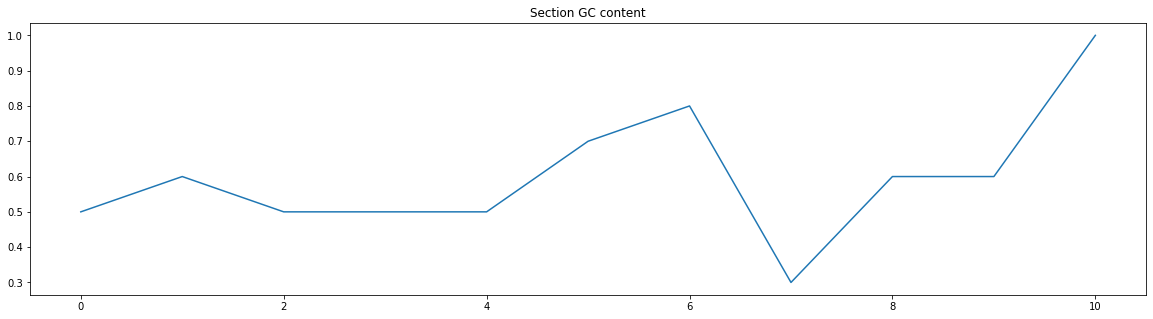

In [14]:
plt.figure(figsize = (20, 5))
plt.plot(sig)
plt.title('Section GC content');

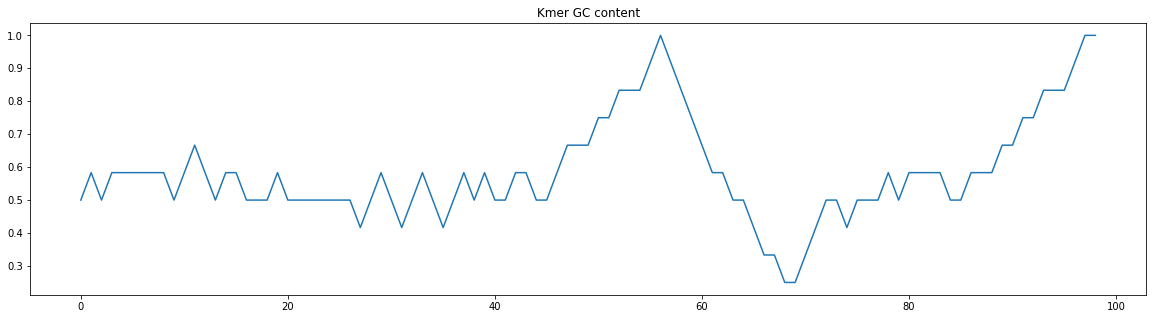

In [15]:
plt.figure(figsize = (20, 5))
plt.plot(sig2)
plt.title('Kmer GC content');

In [0]:
one_hot_signal = one_hot_dna(gene_signal)

In [0]:
def gc_filter(k):
  sig_filter = np.zeros((k, 4))
  sig_filter[:, 2:] = 1
  return sig_filter

In [0]:
gc_content = lambda s, k: signal.correlate(s, gc_filter(k), mode= 'same')/k

In [0]:
gc_sig = gc_content(one_hot_signal, 12)

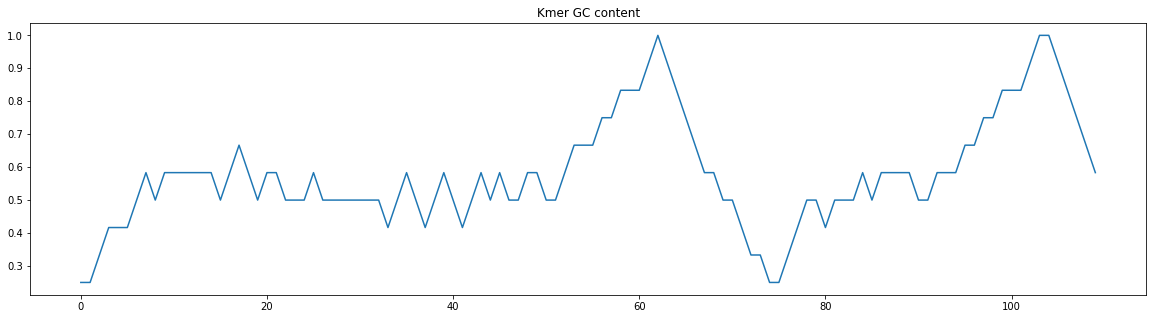

In [20]:
plt.figure(figsize = (20, 5))
plt.plot(gc_sig[:, 2])
plt.title('Kmer GC content');